## Clone the Repository

In [1]:
!git clone https://github.com/sovit-123/fastercnn-pytorch-training-pipeline.git

Cloning into 'fastercnn-pytorch-training-pipeline'...
remote: Enumerating objects: 1418, done.
remote: Counting objects: 100% (514/514), done.
remote: Compressing objects: 100% (185/185), done.
remote: Total 1418 (delta 378), reused 388 (delta 329), pack-reused 904 (from 1)
Receiving objects: 100% (1418/1418), 12.84 MiB | 21.67 MiB/s, done.
Resolving deltas: 100% (960/960), done.


In [2]:
# Enter the repo directory.
%cd fastercnn-pytorch-training-pipeline/

/content/fastercnn-pytorch-training-pipeline


In [3]:
# Install the Requirements
!pip install -r requirements.txt

  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.4/102.4 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 952.4/952.4 kB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 59.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 109.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 110.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 869.5/869.5 kB 51.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.6/113.6 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.2/62.2 MB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 19.5 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)


In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="2r4glkThm1mrhJaKt5ha")
project = rf.workspace("myws-v1e5m").project("bbb_hack")
version = project.version(4)
dataset = version.download("voc")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.4/80.4 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.3 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.17.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3, but you have protobuf 3.20.1 which is incompatible.
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to BBB_hack-4 in voc:: 100%|██████████| 11591/11591 [00:03<00:00, 3465.82it/s]


In [8]:
%cd /content/fastercnn-pytorch-training-pipeline/data_configs
!touch custom_data.yaml
%%writefile custom_data.yaml
# Images and labels direcotry should be relative to train.py
TRAIN_DIR_IMAGES: '/content/BBB_hack-4/train'
TRAIN_DIR_LABELS: '/content/BBB_hack-4/train'
VALID_DIR_IMAGES: '/content/BBB_hack-4/valid'
VALID_DIR_LABELS: '/content/BBB_hack-4/valid'

# Class names.
CLASSES: [
    '__background__',
    'bicycle', 'bus', 'car', 'drone', 'harbor', 'large-vehicle', 'person', 'plane', 'ship', 'small-vehicle', 'storage-tank', 'truck', 'van'
]

# Number of classes (object classes + 1 for background class in Faster RCNN).
NC: 14

# Whether to save the predictions of the validation set while training.
SAVE_VALID_PREDICTION_IMAGES: True

/content/fastercnn-pytorch-training-pipeline/data_configs


UsageError: Line magic function `%%writefile` not found.


## Training

In [10]:
%cd /content

/content


In [14]:
!python /content/fastercnn-pytorch-training-pipeline/train.py --data /content/fastercnn-pytorch-training-pipeline/data_configs/custom_data.yaml --epochs 55 --model fasterrcnn_resnet50_fpn_v2 --name custom_training --batch 8

2024-10-11 16:22:21.875462: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-11 16:22:21.895993: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-11 16:22:21.901919: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-11 16:22:21.916186: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-11 16:22:23.075542: W tensorflow/compiler/tf2

## Visualize Validation Results

In [15]:
import matplotlib.pyplot as plt
import glob as glob

Number of validation images: 8


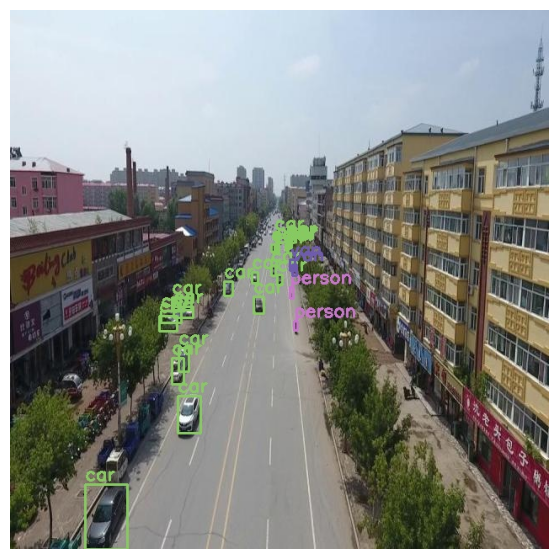

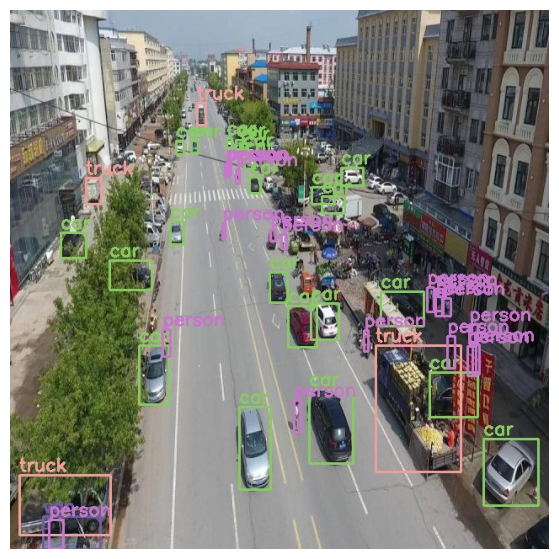

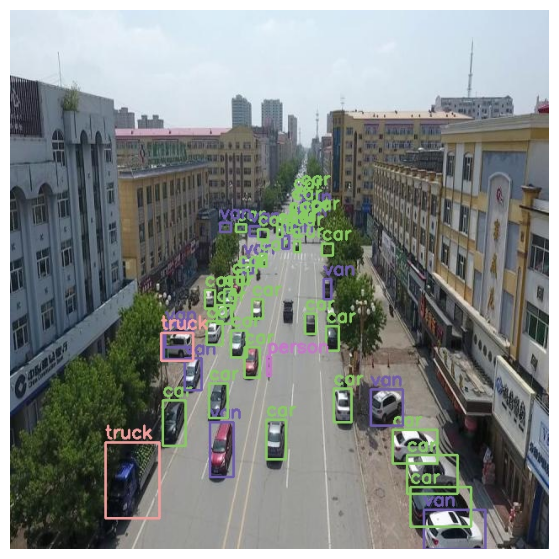

In [19]:
results_dir_path = '/content/outputs/training/custom_training'
valid_images = glob.glob(f"{results_dir_path}/*.jpg")
print(f"Number of validation images: {len(valid_images)}")
for i in range(3):
    plt.figure(figsize=(10, 7))
    image = plt.imread(valid_images[i])
    plt.imshow(image)
    plt.axis('off')
    plt.show()

Check Out the Repo for Latest Updates
https://github.com/sovit-123/fastercnn-pytorch-training-pipeline

## Evaluation

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.


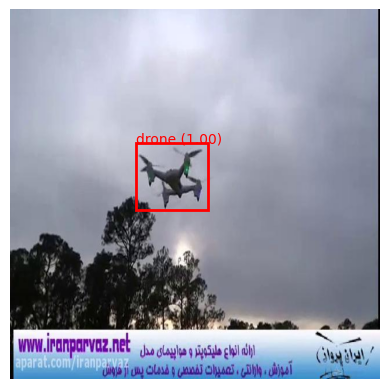

In [30]:
import torch
import torchvision
from torchvision.models.detection import fasterrcnn_resnet50_fpn_v2
from torchvision.transforms import functional as F
from PIL import Image
import matplotlib.pyplot as plt
import random
import os

model = fasterrcnn_resnet50_fpn_v2(pretrained=False, num_classes=14)
CLASSES = ['__background__', 'bicycle', 'bus', 'car', 'drone', 'harbor', 'large-vehicle', 'person', 'plane', 'ship', 'small-vehicle', 'storage-tank', 'truck', 'van']

checkpoint = torch.load('/content/outputs/training/custom_training/best_model.pth')

model_state_dict = checkpoint['model_state_dict']

model.load_state_dict(model_state_dict)

model.eval()

test_image_dir = '/content/BBB_hack-4/test'  
test_images = os.listdir(test_image_dir)
random_image_path = os.path.join(test_image_dir, random.choice(test_images))

image = Image.open(random_image_path).convert("RGB")

image_tensor = F.to_tensor(image)
image_tensor = image_tensor.unsqueeze(0)

with torch.no_grad():
    predictions = model(image_tensor)

plt.imshow(image)
plt.axis('off')

for box, score, label in zip(predictions[0]['boxes'], predictions[0]['scores'], predictions[0]['labels']):
    if score > 0.5:  
        xmin, ymin, xmax, ymax = box.tolist()
        plt.gca().add_patch(plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, fill=False, color='red', linewidth=2))
        plt.text(xmin, ymin, f"{CLASSES[label]} ({score:.2f})", color='red')

plt.show()

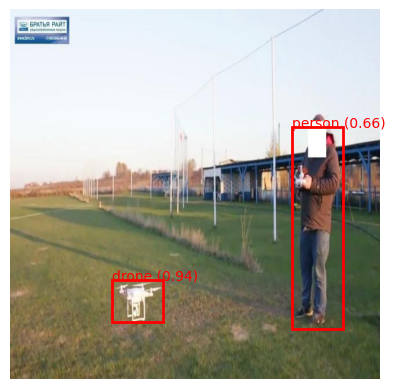

In [41]:

random_image_path = os.path.join(test_image_dir, random.choice(test_images))

image = Image.open(random_image_path).convert("RGB")

image_tensor = F.to_tensor(image)
image_tensor = image_tensor.unsqueeze(0)

with torch.no_grad():
    predictions = model(image_tensor)

plt.imshow(image)
plt.axis('off')

for box, score, label in zip(predictions[0]['boxes'], predictions[0]['scores'], predictions[0]['labels']):
    if score > 0.5:  
        xmin, ymin, xmax, ymax = box.tolist()
        plt.gca().add_patch(plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, fill=False, color='red', linewidth=2))
        plt.text(xmin, ymin, f"{CLASSES[label]} ({score:.2f})", color='red')

plt.show()

In [ ]:
import cv2
import random

video = cv2.VideoCapture('/content/videoplayback.mp4')

total_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
frame_width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(video.get(cv2.CAP_PROP_FPS))

out = cv2.VideoWriter('random_frames_video.mp4', cv2.VideoWriter_fourcc(*'mp4v'), fps, (frame_width, frame_height))
frame_count=0
random_frame_numbers = random.sample(range(total_frames), 100)

for frame_number in sorted(random_frame_numbers):
    print(f"Number of frames processed: {frame_count}")

    video.set(cv2.CAP_PROP_POS_FRAMES, frame_number)

    ret, frame = video.read()
    if ret:
      image = Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

      image_tensor = F.to_tensor(image)
      image_tensor = image_tensor.unsqueeze(0)

      with torch.no_grad():
          predictions = model(image_tensor)

      for box, score, label in zip(predictions[0]['boxes'], predictions[0]['scores'], predictions[0]['labels']):
          if score > 0.5:
              xmin, ymin, xmax, ymax = box.tolist()
              cv2.rectangle(frame, (int(xmin), int(ymin)), (int(xmax), int(ymax)), (0, 255, 0), 2)
              cv2.putText(frame, f"{CLASSES[label]} ({score:.2f})", (int(xmin), int(ymin) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

      out.write(frame)
      frame_count += 1
    else:
        break

video.release()
out.release()
cv2.destroyAllWindows()

print("New video created with 100 random frames.")


Number of frames processed: 0
Number of frames processed: 1
Number of frames processed: 2
Number of frames processed: 3
Number of frames processed: 4
Number of frames processed: 5
Number of frames processed: 6
Number of frames processed: 7
Number of frames processed: 8
Number of frames processed: 9
Number of frames processed: 10
Number of frames processed: 11
Number of frames processed: 12
Number of frames processed: 13
Number of frames processed: 14
Number of frames processed: 15
Number of frames processed: 16
Number of frames processed: 17
Number of frames processed: 18
Number of frames processed: 19
Number of frames processed: 20
Number of frames processed: 21
Number of frames processed: 22
Number of frames processed: 23
Number of frames processed: 24
Number of frames processed: 25
Number of frames processed: 26
Number of frames processed: 27
